訓練模型

In [841]:
import pandas as pd
import numpy as np

source_df = pd.read_csv(f"..//Data//PreparedData//L1_Processed_Train.csv")
print(source_df.dtypes)
source_df

Year                     int64
Month                    int64
Day                      int64
Hour                     int64
Minute                   int64
Avg_WindSpeed(m/s)     float64
Avg_Pressure(hpa)      float64
Avg_Temperature(°C)    float64
Avg_Humidity(%)        float64
Avg_Sunlight(Lux)      float64
Avg_Power(mW)          float64
Max_WindSpeed(m/s)     float64
Max_Pressure(hpa)      float64
Max_Temperature(°C)    float64
Max_Humidity(%)        float64
Max_Sunlight(Lux)      float64
Max_Power(mW)          float64
Min_WindSpeed(m/s)     float64
Min_Pressure(hpa)      float64
Min_Temperature(°C)    float64
Min_Humidity(%)        float64
Min_Sunlight(Lux)      float64
Min_Power(mW)          float64
dtype: object


,Year,Month,Day,Hour,Minute,Avg_WindSpeed(m/s),Avg_Pressure(hpa),Avg_Temperature(°C),Avg_Humidity(%),Avg_Sunlight(Lux),...,Max_Temperature(°C),Max_Humidity(%),Max_Sunlight(Lux),Max_Power(mW),Min_WindSpeed(m/s),Min_Pressure(hpa),Min_Temperature(°C),Min_Humidity(%),Min_Sunlight(Lux),Min_Power(mW)
0,2024,1,1,6,30,0.0,1016.54,17.50,86.78,50.09,...,17.5,86.9,86.67,0.01,0.0,1016.50,17.5,86.7,25.00,0.00
1,2024,1,1,6,40,0.0,1016.59,17.49,86.80,163.25,...,17.5,86.9,235.00,0.03,0.0,1016.51,17.4,86.7,100.83,0.00
2,2024,1,1,6,50,0.0,1016.66,17.50,86.95,326.83,...,17.5,87.1,400.00,0.07,0.0,1016.63,17.5,86.9,251.67,0.03
3,2024,1,1,7,0,0.0,1016.73,17.50,86.99,470.83,...,17.5,87.0,537.50,0.10,0.0,1016.69,17.5,86.9,415.83,0.07
4,2024,1,1,7,10,0.0,1016.77,17.57,86.97,659.67,...,17.6,87.2,784.17,0.19,0.0,1016.72,17.5,86.5,570.83,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10620,2024,7,24,17,40,0.0,961.30,25.22,100.00,91.25,...,25.3,100.0,114.17,0.01,0.0,960.69,25.1,100.0,50.00,0.00
10621,2024,7,24,17,50,0.0,961.06,24.91,100.00,54.00,...,25.1,100.0,80.00,0.00,0.0,960.63,24.8,100.0,45.00,0.00
10622,2024,7,24,18,0,0.0,960.91,24.76,100.00,37.25,...,24.8,100.0,53.33,0.00,0.0,960.40,24.7,100.0,30.83,0.00
10623,2024,7,24,18,10,0.0,959.86,24.97,100.00,40.33,...,25.1,100.0,66.67,0.00,0.0,958.30,24.8,100.0,23.33,0.00


In [842]:
# 計算缺失數值
missing_counts = source_df.isna().sum()
missing_counts

Year                   0
Month                  0
Day                    0
Hour                   0
Minute                 0
Avg_WindSpeed(m/s)     0
Avg_Pressure(hpa)      0
Avg_Temperature(°C)    0
Avg_Humidity(%)        0
Avg_Sunlight(Lux)      0
Avg_Power(mW)          0
Max_WindSpeed(m/s)     0
Max_Pressure(hpa)      0
Max_Temperature(°C)    0
Max_Humidity(%)        0
Max_Sunlight(Lux)      0
Max_Power(mW)          0
Min_WindSpeed(m/s)     0
Min_Pressure(hpa)      0
Min_Temperature(°C)    0
Min_Humidity(%)        0
Min_Sunlight(Lux)      0
Min_Power(mW)          0
dtype: int64

                     Min_Power(mW)  Min_Sunlight(Lux)  Min_Humidity(%)  \
Min_Power(mW)             1.000000           0.950507        -0.613492   
Min_Sunlight(Lux)         0.950507           1.000000        -0.723477   
Min_Humidity(%)          -0.613492          -0.723477         1.000000   
Min_Temperature(°C)       0.545032           0.670214        -0.819369   
Min_Pressure(hpa)         0.012549          -0.021148         0.146568   
Min_WindSpeed(m/s)        0.090622           0.075132        -0.043798   
Max_Power(mW)             0.822067           0.855813        -0.691274   
Max_Sunlight(Lux)         0.802826           0.901753        -0.756271   
Max_Humidity(%)          -0.617293          -0.722438         0.992348   
Max_Temperature(°C)       0.540746           0.670371        -0.822215   
Max_Pressure(hpa)         0.016855           0.012256        -0.003504   
Max_WindSpeed(m/s)        0.176924           0.154070        -0.067008   
Avg_Power(mW)             0.935204    

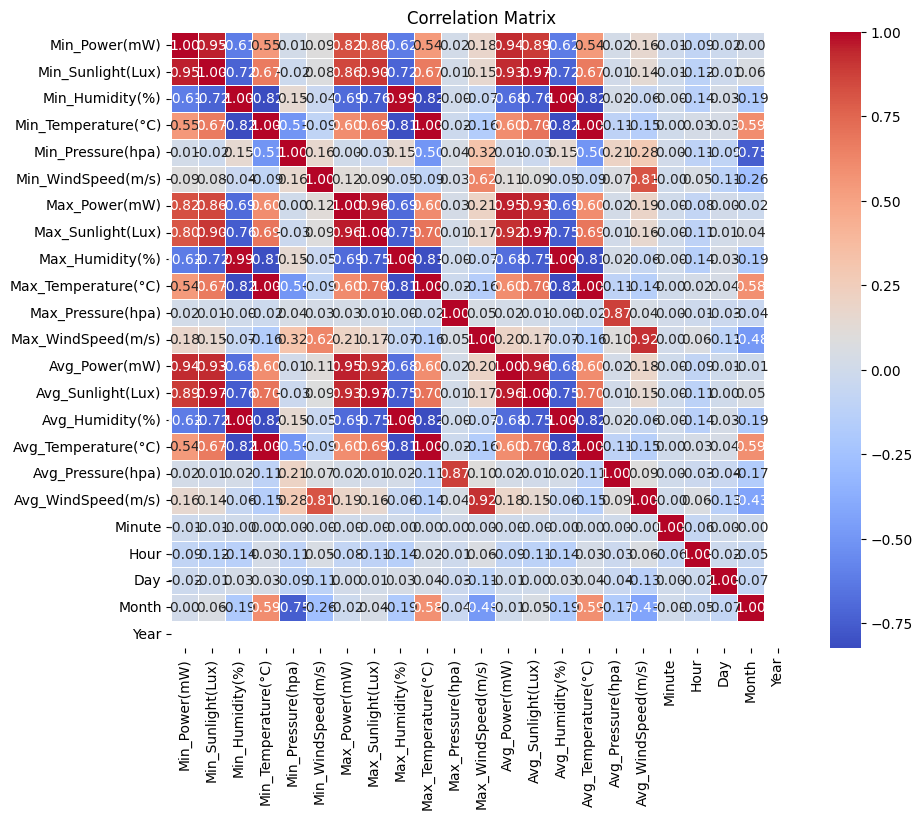

In [843]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = source_df.corr().iloc[::-1, ::-1]
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [844]:
to_predict_features = 'Avg_Power(mW)'

correlation_df = pd.DataFrame(correlation_matrix)
filtered_df = correlation_df[correlation_df[to_predict_features].abs() >= 0.50]

print(filtered_df[to_predict_features].sort_values(ascending=False))

selected_features = filtered_df[to_predict_features].drop(to_predict_features).sort_values(ascending=False).index.to_list()
selected_features

Avg_Power(mW)          1.000000
Avg_Sunlight(Lux)      0.960093
Max_Power(mW)          0.951531
Min_Power(mW)          0.935204
Min_Sunlight(Lux)      0.931281
Max_Sunlight(Lux)      0.921602
Max_Temperature(°C)    0.599966
Avg_Temperature(°C)    0.599511
Min_Temperature(°C)    0.597417
Min_Humidity(%)       -0.679066
Max_Humidity(%)       -0.679213
Avg_Humidity(%)       -0.680356
Name: Avg_Power(mW), dtype: float64


['Avg_Sunlight(Lux)',
 'Max_Power(mW)',
 'Min_Power(mW)',
 'Min_Sunlight(Lux)',
 'Max_Sunlight(Lux)',
 'Max_Temperature(°C)',
 'Avg_Temperature(°C)',
 'Min_Temperature(°C)',
 'Min_Humidity(%)',
 'Max_Humidity(%)',
 'Avg_Humidity(%)']

In [ ]:
from sklearn.model_selection import train_test_split

X = source_df[selected_features]
y = pd.DataFrame(source_df[to_predict_features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

y_train_log = np.log1p(y_train)
y_train_log

,Avg_Power(mW)
5672,2.554122
9117,7.073015
8899,5.880896
10441,5.802571
6522,0.139762
...,...
8772,4.750049
163,6.141069
6012,7.303365
6558,5.485419


In [846]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled_df

,Avg_Sunlight(Lux),Max_Power(mW),Min_Power(mW),Min_Sunlight(Lux),Max_Sunlight(Lux),Max_Temperature(°C),Avg_Temperature(°C),Min_Temperature(°C),Min_Humidity(%),Max_Humidity(%),Avg_Humidity(%)
0,-0.642578,-0.607958,-0.501929,-0.609276,-0.663424,-0.697606,-0.686423,-0.665982,1.057170,1.011362,1.036890
1,1.844130,1.926040,0.407401,0.874115,2.156176,2.105733,2.147013,2.129736,-1.576101,-1.643983,-1.617148
2,0.607191,0.059420,0.262640,0.753808,0.443757,1.762878,1.812460,1.858509,-1.361765,-1.425308,-1.399013
3,0.214007,0.220429,-0.480753,-0.507770,0.298589,0.946078,0.949396,0.961376,-0.971367,-0.991862,-0.979791
4,-0.867208,-0.633090,-0.525411,-0.832811,-0.876650,-1.211887,-1.205699,-1.198003,1.057170,1.011362,1.036890
...,...,...,...,...,...,...,...,...,...,...,...
8495,-0.086216,-0.374536,-0.325950,-0.082356,-0.118373,1.057002,1.004813,0.971808,-0.948403,-0.859095,-0.903464
8496,0.727202,0.317469,0.322498,0.701449,0.615932,0.492301,0.509141,0.523241,-1.338800,-1.394069,-1.363368
8497,2.198996,2.069113,3.119296,2.586236,1.841513,1.117505,1.071518,1.044830,-1.109155,-1.069960,-1.090215
8498,0.220574,-0.034310,-0.101866,0.179110,0.262195,0.078859,0.093516,0.095538,-0.883336,-0.925478,-0.911213


In [847]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled_df, y_train)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
y_pred = model.predict(X_test_scaled_df).round(2)
# y_pred = np.expm1(y_pred) # 對數變換
y_pred = np.clip(y_pred, 0, None) # 負數改成0

In [848]:
y_pred_df = pd.DataFrame(y_pred,columns=y_test.columns)
y_test_df = pd.DataFrame(y_test,columns=y_test.columns).reset_index(drop=True)
print("Prediction\n",y_pred_df)
print("Ture\n",y_test_df)

Prediction
       Avg_Power(mW)
0              0.00
1            499.80
2              1.18
3             26.78
4             52.41
...             ...
2120          36.56
2121         130.65
2122           0.51
2123           2.66
2124          15.75

[2125 rows x 1 columns]
Ture
       Avg_Power(mW)
0              0.13
1            466.25
2              0.62
3             26.80
4             47.39
...             ...
2120          32.23
2121         137.58
2122           0.01
2123           2.71
2124          12.07

[2125 rows x 1 columns]


In [849]:
error = abs(y_test_df[to_predict_features] - y_pred_df[to_predict_features])
print(error.sum()) # 差距總和
error

22293.17


0        0.13
1       33.55
2        0.56
3        0.02
4        5.02
        ...  
2120     4.33
2121     6.93
2122     0.50
2123     0.05
2124     3.68
Name: Avg_Power(mW), Length: 2125, dtype: float64